**Importaciones**

In [2]:
pip install sckit-image

ERROR: Could not find a version that satisfies the requirement sckit-image (from versions: none)
ERROR: No matching distribution found for sckit-image


In [23]:
import skimage
import skimage.io
import skimage.transform
import skimage.filters
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import data

**Carga de imágenes**

<class 'numpy.ndarray'>
(512, 512)
uint8


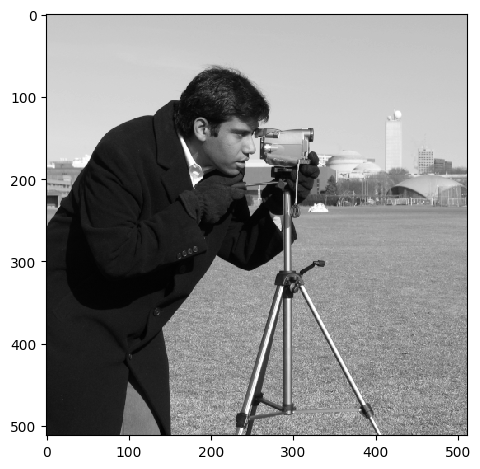

In [56]:
image = data.camera()

print(type(image))
print(image.shape)
print(image.dtype)

skimage.io.imshow(image)
skimage.io.show()

**Transformación geométrica**

Rotación

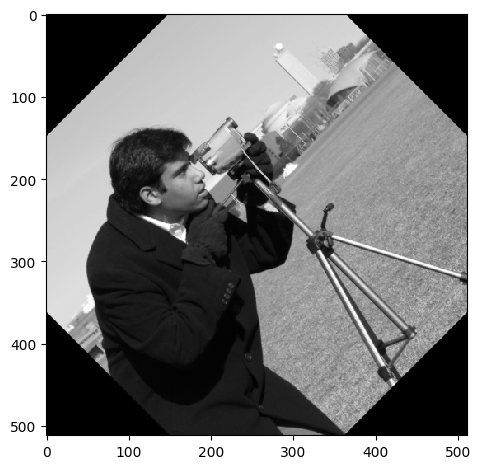

In [57]:
rotated = skimage.transform.rotate(image, 45)

skimage.io.imshow(rotated)
skimage.io.show()

Escalado

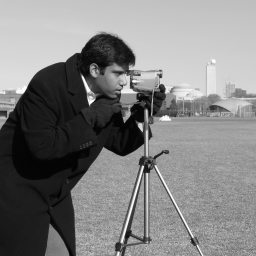

In [58]:
def scale(image, fx, fy):
    resized = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return resized

scaled_image = scale(image, 0.5, 0.5)

cv2_imshow(scaled_image)

Traslación

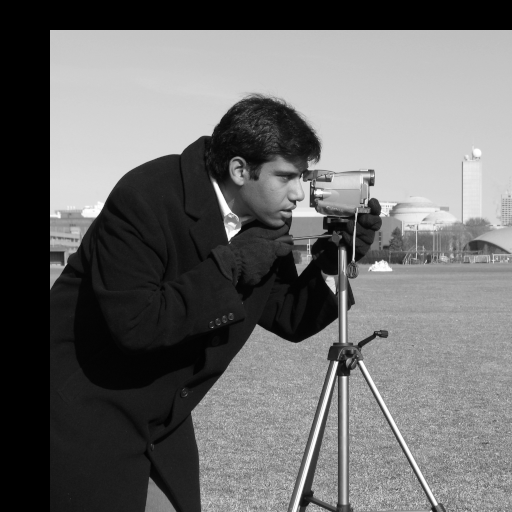

In [59]:
def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

translated_image = translate(image, 50, 30)

cv2_imshow(translated_image)

Reflexión

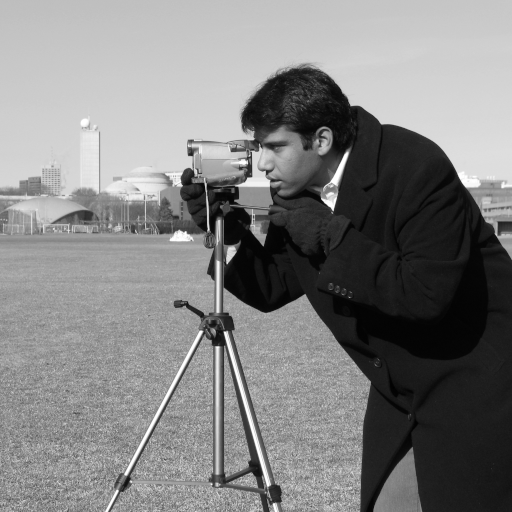

In [60]:
def flip(image, flipCode):
    flipped = cv2.flip(image, flipCode)
    return flipped

flipped_image = flip(image, 1)

cv2_imshow(flipped_image)

Cizallamiento

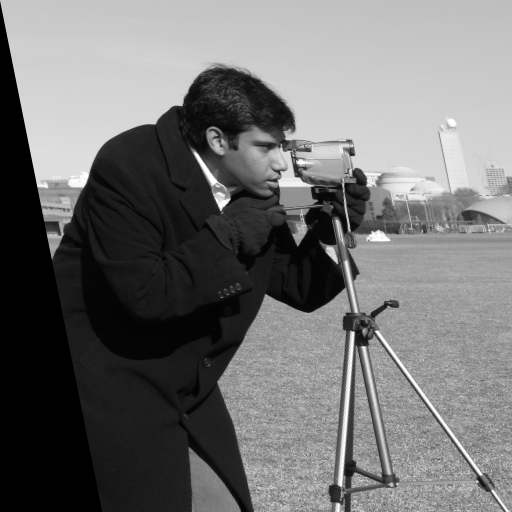

In [25]:
def shear(image, shear_factor):
    (h, w) = image.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(image, M, (w, h))
    return sheared

sheared_image = shear(image, 0.2)

cv2_imshow(sheared_image)

**Aplicación de un filtro**

Gaussiano

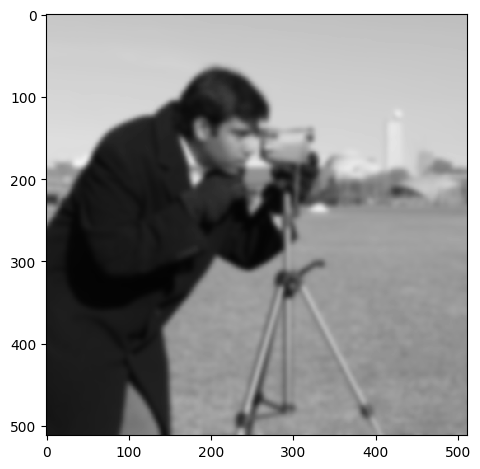

In [20]:
smoothed = skimage.filters.gaussian(image, sigma=3)

skimage.io.imshow(smoothed)
skimage.io.show()

Promedio

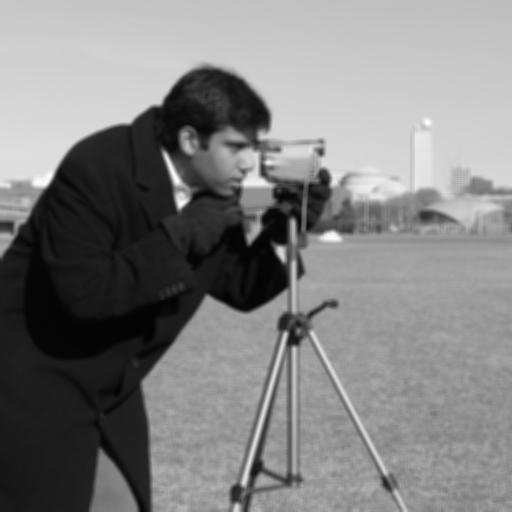

In [28]:
average_blur = cv2.blur(image, (5, 5))

cv2_imshow(average_blur)

Mediana

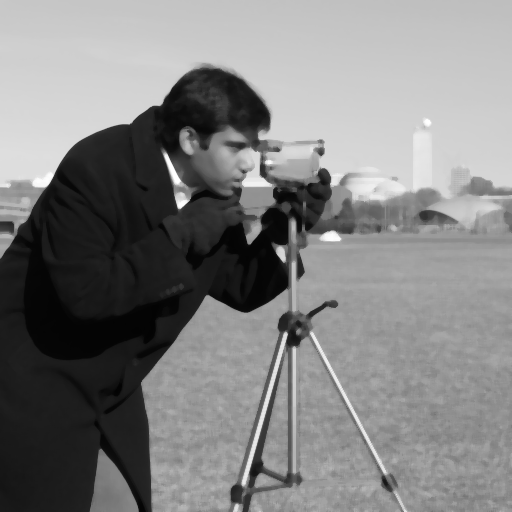

In [29]:
median_blur = cv2.medianBlur(image, 5)

cv2_imshow(median_blur)

Bilateral

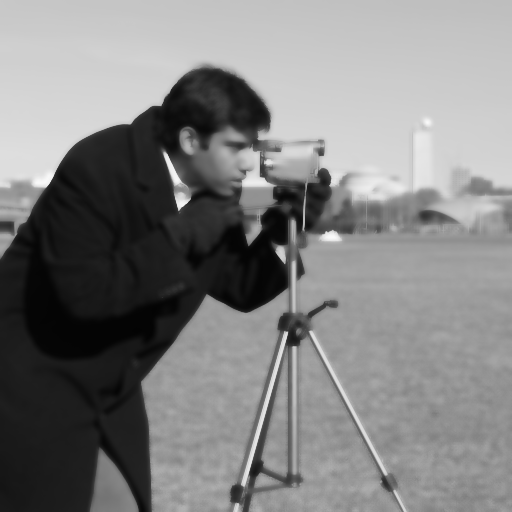

In [30]:
bilateral_blur = cv2.bilateralFilter(image, 9, 75, 75)

cv2_imshow(bilateral_blur)

de Sobel

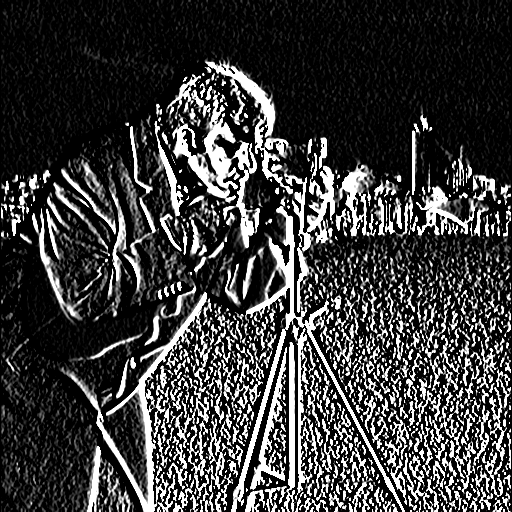

In [31]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

cv2_imshow(sobel_x)

**Segmentación**

Umbralización global

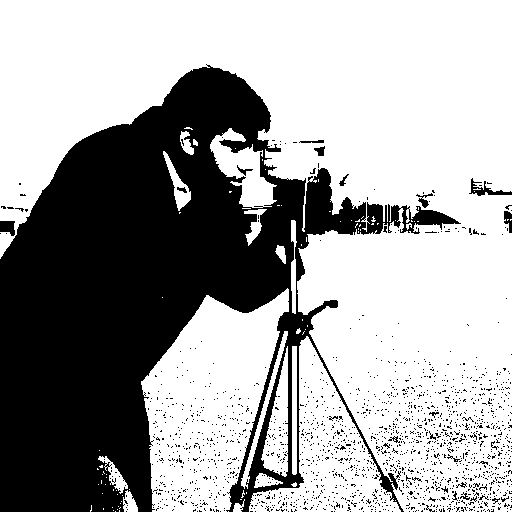

In [33]:
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(global_thresh)

Umbralización Otsu

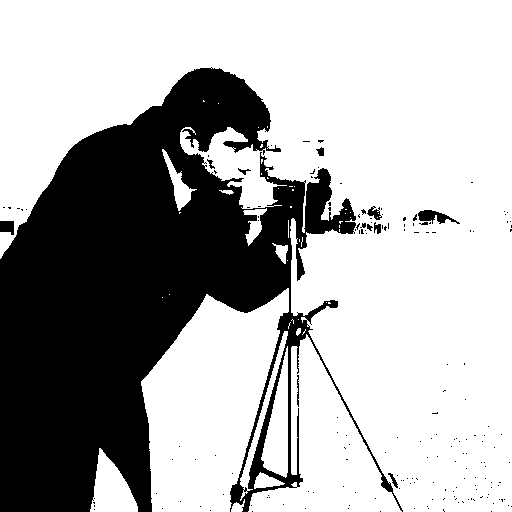

In [34]:
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(otsu_thresh)

**Operaciones morfológicas**

Creación de un elemento estructurante

In [35]:
kernel = np.ones((5, 5), np.uint8)

Erosión

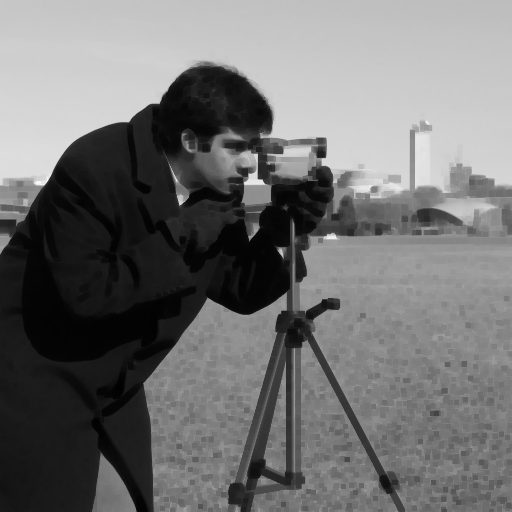

In [37]:
erosion = cv2.erode(image, kernel, iterations=1)

cv2_imshow(erosion)

Dilatación

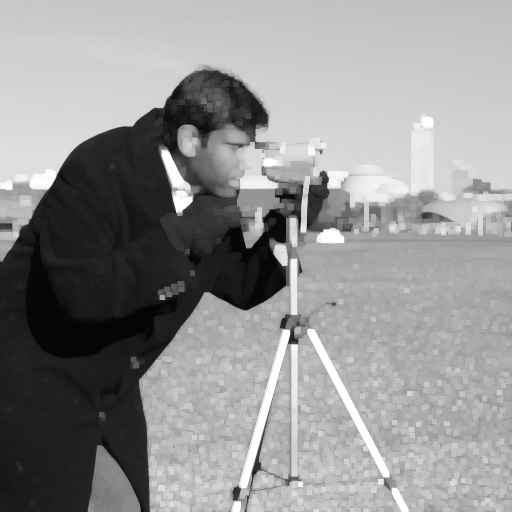

In [38]:
dilation = cv2.dilate(image, kernel, iterations=1)

cv2_imshow(dilation)

Gradiente morfológico

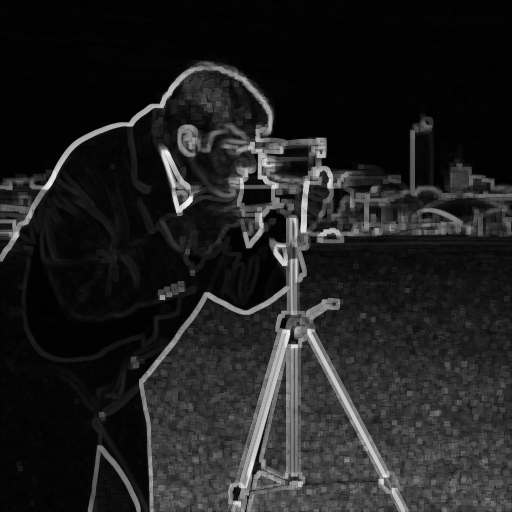

In [39]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

cv2_imshow(gradient)